In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Read data from Excel file

In [2]:
excel_file_path = "dataset-wine.xlsx"
df = pd.read_excel(excel_file_path, header=None)  # Assuming there is no header in the Excel file

## Show excel head

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    int64  
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    int64  
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [6]:
df[13].value_counts()

2    71
1    59
3    48
Name: 13, dtype: int64

## Extract Features & Labels

In [7]:
features = df.iloc[:, :13].to_numpy()
labels = df.iloc[:, 13].to_numpy()

# Min-max normalization

In [8]:
def min_max_normalize(data):
    # Min-max normalization function
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)
    normalized_data = (data - min_vals) / (max_vals - min_vals + 1e-10)  # Adding small constant to avoid division by zero
    return normalized_data

In [9]:
features_normalized = min_max_normalize(features)

# Split Data

In [10]:
shuffled_data = np.random.permutation(len(features))
shuffled_data

array([ 28, 112,  41, 141,   2, 160, 103, 120, 138,  21, 146,  59, 161,
       126,  72,  43, 113,  90, 169,  29,  24, 168, 102, 111,  87,  23,
        31,  62,  78, 145, 121, 155,  53, 173,  44,  40,  86, 133,  52,
       166, 100, 167,  63, 135,  73,   5, 163,  67, 107,  30,  93,  12,
        18, 125,  17,  48,  16, 142, 148, 175,  70, 129,  39,   1,  76,
        47,  11, 114,  94, 127, 128,   4,  38, 139,  58,  96,  79,  92,
       153, 131, 104, 101,  83, 130, 157, 154,  22,  57, 136,  32,  68,
        51,  55,  60, 143, 122,  49, 106,  46, 105,  14,  35,  54,  80,
         0,  75,   8, 174, 151,  61,  42, 147,  84,  34,  74,  82, 118,
       164,  15,  81, 159, 108, 117,  26, 123,  25,   7,  33,   6, 177,
        97, 109,   9, 152,  45, 132, 170, 119,  66, 134,  37, 116, 110,
       162,  89,  98, 156, 140,  19, 165, 124, 172,   3,  10, 158,  99,
        27,  36,  69,  65,  50, 176,  85,  88, 171, 115, 144, 137,  20,
       149,  71,  91,  56, 150,  95,  77,  13,  64])

In [11]:
def Normal_Split():
    shuffled_data = np.random.permutation(len(features))
    
    train_data, test_data = np.split(shuffled_data, [int(0.8 * len(shuffled_data))])
    
    train_features = features_normalized[train_data]
    train_labels = labels[train_data]
    test_features = features_normalized[test_data]
    test_labels = labels[test_data]

    return train_features, test_features, train_labels, test_labels

In [12]:
train_features, test_features, train_labels, test_labels = Normal_Split()
print(len(features))
print(len(train_features))
print(len(test_features))

178
142
36


# Perceptron

In [13]:
class Perceptron:
    def __init__(self, num_inputs):
        # Initialize weights and bias to small random values
        self.weights = np.random.randn(num_inputs)
        self.bias = np.random.randn()

    def linear_activation(self, x):
        # Linear activation function
        return x
    
    def predict(self, inputs):
        # Compute the weighted sum and apply linear activation
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.linear_activation(weighted_sum)

    def train(self, training_data, targets, learning_rate=0.1, epochs=100):
        for epoch in range(epochs):
            # Shuffle the training data at the beginning of each epoch
            shuffled_indices = np.random.permutation(len(training_data))
            training_data = training_data[shuffled_indices]
            targets = targets[shuffled_indices]

            for inputs, target in zip(training_data, targets):
                prediction = self.predict(inputs)
                error = target - prediction
                # print(self.weights)
                # Update weights and bias
                self.weights = self.weights - learning_rate * error * -1 * 1 * inputs
                self.bias = self.bias - learning_rate * error * -1 * 1 * 1

# Example usage

## Create a perceptron with 13 inputs

In [14]:
perceptron = Perceptron(num_inputs=13)

## Train

In [15]:
perceptron.train(train_features, train_labels, learning_rate=0.001, epochs=10000)

## Predict

In [16]:
predictions_train = np.round([perceptron.predict(inputs) for inputs in train_features])
predictions_test = np.round([perceptron.predict(inputs) for inputs in test_features])

## Confusion Matrix

C:\Users\edward\AppData\Local\Temp\ipykernel_19360\2682923516.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


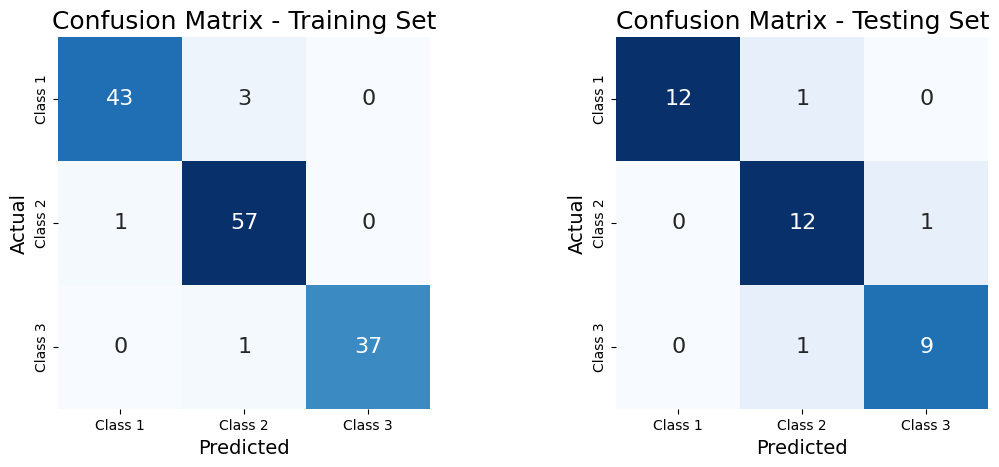

In [17]:
confusion_matrix_train = confusion_matrix(train_labels, predictions_train)
confusion_matrix_test = confusion_matrix(test_labels, predictions_test)

# Create heatmap for confusion matrices with increased font size
fig, axs = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'wspace': 0.5})

axs[0].imshow(confusion_matrix_train, cmap='Blues', interpolation='nearest')
sns.heatmap(confusion_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 1', 'Class 2', 'Class 3'],
            annot_kws={"size": 16}, ax=axs[0])  # Set the font size for annotation

axs[0].set_title('Confusion Matrix - Training Set', fontsize=18)  # Increase font size for the title
axs[0].set_xlabel('Predicted', fontsize=14)
axs[0].set_ylabel('Actual', fontsize=14)

axs[1].imshow(confusion_matrix_test, cmap='Blues', interpolation='nearest')
sns.heatmap(confusion_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 1', 'Class 2', 'Class 3'],
            annot_kws={"size": 16}, ax=axs[1])  # Set the font size for annotation

axs[1].set_title('Confusion Matrix - Testing Set', fontsize=18)  # Increase font size for the title
axs[1].set_xlabel('Predicted', fontsize=14)
axs[1].set_ylabel('Actual', fontsize=14)

plt.tight_layout()
plt.show()

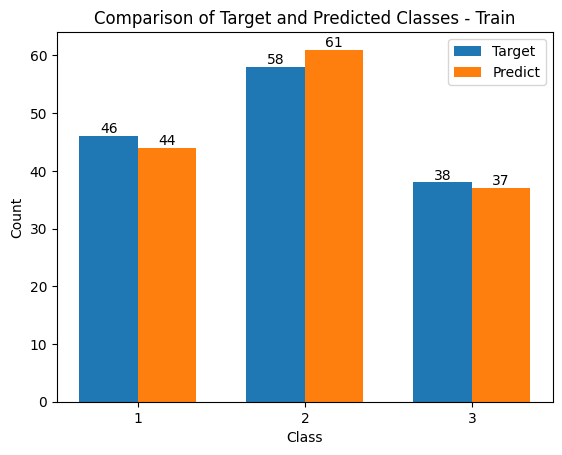

In [18]:
# Convert predictions_train to integers
predictions_train = predictions_train.astype(int)

# Count occurrences of each class in target and predict arrays
target_counts = np.bincount(train_labels)
predict_counts = np.bincount(predictions_train)

# Make sure both arrays have the same length
max_len = max(len(target_counts), len(predict_counts))
target_counts = np.pad(target_counts, (0, max_len - len(target_counts)))
predict_counts = np.pad(predict_counts, (0, max_len - len(predict_counts)))

# Plotting
labels = np.arange(1, max_len)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(labels - width/2, target_counts[1:], width, label='Target')
rects2 = ax.bar(labels + width/2, predict_counts[1:], width, label='Predict')

# Add labels, title, and legend
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Comparison of Target and Predicted Classes - Train')
ax.set_xticks(labels)
ax.legend()

# Display the count labels on top of each bar
for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height, '%d' % int(height), ha='center', va='bottom')

for rect in rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height, '%d' % int(height), ha='center', va='bottom')

# Display the plot
plt.show()

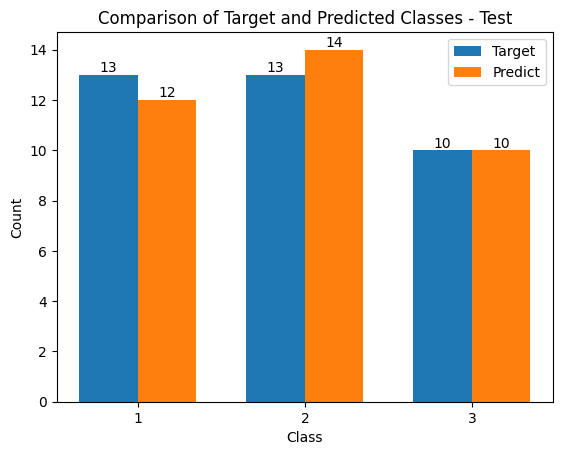

In [19]:
# Convert predictions_train to integers
predictions_test = predictions_test.astype(int)

# Count occurrences of each class in target and predict arrays
target_counts = np.bincount(test_labels)
predict_counts = np.bincount(predictions_test)

# Make sure both arrays have the same length
max_len = max(len(target_counts), len(predict_counts))
target_counts = np.pad(target_counts, (0, max_len - len(target_counts)))
predict_counts = np.pad(predict_counts, (0, max_len - len(predict_counts)))

# Plotting
labels = np.arange(1, max_len)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(labels - width/2, target_counts[1:], width, label='Target')
rects2 = ax.bar(labels + width/2, predict_counts[1:], width, label='Predict')

# Add labels, title, and legend
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Comparison of Target and Predicted Classes - Test')
ax.set_xticks(labels)
ax.legend()

# Display the count labels on top of each bar
for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height, '%d' % int(height), ha='center', va='bottom')

for rect in rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height, '%d' % int(height), ha='center', va='bottom')

# Display the plot
plt.show()


## Plotting the results

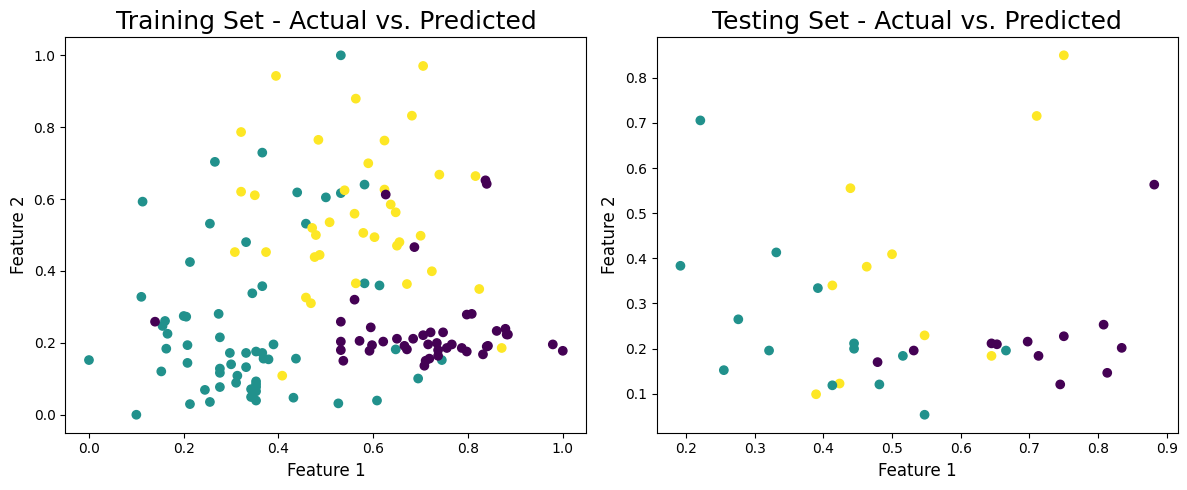

In [20]:
plt.figure(figsize=(12, 5))

# Training Set Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(train_features[:, 0], train_features[:, 1], c=predictions_train, cmap='viridis')
plt.title('Training Set - Actual vs. Predicted', fontsize=18)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)

# Testing Set Scatter Plot
plt.subplot(1, 2, 2)
plt.scatter(test_features[:, 0], test_features[:, 1], c=predictions_test, cmap='viridis')
plt.title('Testing Set - Actual vs. Predicted', fontsize=18)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)

plt.tight_layout()
plt.show()

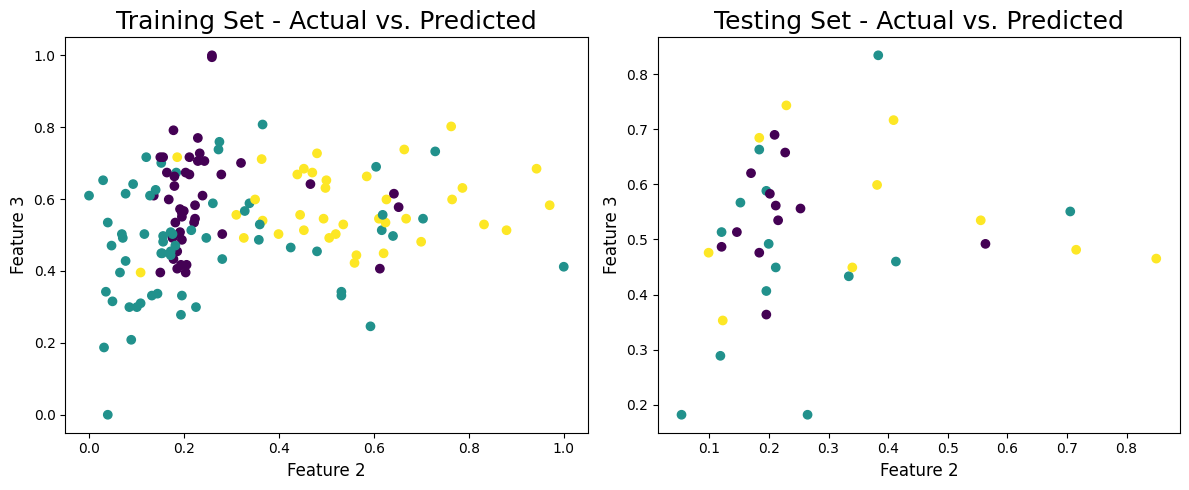

In [21]:
plt.figure(figsize=(12, 5))

# Training Set Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(train_features[:, 1], train_features[:, 2], c=predictions_train, cmap='viridis')
plt.title('Training Set - Actual vs. Predicted', fontsize=18)
plt.xlabel('Feature 2', fontsize=12)
plt.ylabel('Feature 3', fontsize=12)

# Testing Set Scatter Plot
plt.subplot(1, 2, 2)
plt.scatter(test_features[:, 1], test_features[:, 2], c=predictions_test, cmap='viridis')
plt.title('Testing Set - Actual vs. Predicted', fontsize=18)
plt.xlabel('Feature 2', fontsize=12)
plt.ylabel('Feature 3', fontsize=12)

plt.tight_layout()
plt.show()